# <html>
   
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: auto; margin: 10px;">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=100px width=auto style="padding:10px; vertical-align: center;">
 
</div>
   
<div   style:"text-align: center; background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  ));width: 400px; height: 30px; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Course: AI </h1>

</div>
    <div   style:"border: 3px solid green;text-align: center; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Project6: Clustering </h1>

</div>

   <div>    
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Mohammad Amanlou- sid:810100084 </h1>

</div>
   

</html>

# Artificial Intelligence Course - Fall 1402
## Computer Assignment #6 - Clustering

# Project Summary
In this project, we intend to analyze the news of the analytical site by using Clustering algorithms
Let's talk about Asr Iran news and try to put them in 1 different categories using the data we have, so that after applying the clustering algorithm, they are placed in their correct cluster as much as possible.

# Part1. 
## PreProcessing

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from hazm import *

### Q1.  If the data were unbalanced, what problems would occur in the clustering process? What solution do you offer to solve this problem? Explain.

When dataset is unbalanced, it means that some clusters have a significantly higher number of data points compared to others. In the context of clustering, this imbalance can lead to several problems:

1. **Bias toward Larger Clusters**: Most clustering algorithms, such as k-means, tend to be biased toward larger clusters. This can result in smaller but potentially interesting clusters being ignored or merged into larger ones, thus leading to a loss of granularity in the analysis.

2. **Poor Cluster Definition**: Larger clusters can dominate the definition of cluster centers, which can skew the results and does not accurately reflect the characteristics of the smaller clusters.

3. **Decreased Cluster Quality**: The quality of the cluster, in terms of intra-cluster homogeneity and inter-cluster separation, can be significantly decreased because the larger clusters may pull the cluster centroids toward them, increasing the heterogeneity of smaller clusters.

To address these issues, you can consider the following solutions:

1. **Resampling the Data**: You can either downsample the majority class (the larger clusters) or upsample the minority class (the smaller clusters) to ensure that the clustering algorithm does not bias toward the larger ones.

2. **Using Density-Based Clustering Algorithms**: Algorithms like DBSCAN (Density-Based Spatial Clustering of Applications with Noise) or OPTICS (Ordering Points To Identify the Clustering Structure) do not require the number of clusters to be specified a priori and can find clusters of varying sizes and densities, which may provide better results for unbalanced datasets.

3. **Anomaly Detection**: Treat the smaller clusters as anomalies or outliers first. Detect these using anomaly detection techniques and then apply clustering to the balanced dataset.

4. **Cluster Algorithms with Weights**: Some algorithms allow assigning weights to data points, giving you the ability to manually balance the influence of data points on the clustering process.

5. **Pre-processing Techniques**: Use feature transformation or sampling techniques that help to reduce the imbalance before clustering, like SMOTE (Synthetic Minority Over-sampling Technique) for sampling, or PCA (Principal Component Analysis) for feature reduction which may lead to a balanced representation of clusters.

6. **Customized Clustering Algorithms**: Modify existing algorithms or develop new ones that are robust to such imbalances. This could involve incorporating algorithms that minimize a different objective function that is less sensitive to the number of points per cluster.

7. **Post-processing of Clusters**: After clustering on the original unbalanced dataset, refine the clusters by splitting the larger clusters and/or merging smaller ones based on additional criteria such as density or distance metrics.

Analyzing the specific characteristics of an unbalanced dataset and choosing the right combination of techniques is essential for effective clustering in such scenarios.

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
df3=pd.read_csv('sw.csv')
stop_words=df3.values.tolist()

In [4]:
data_len = len(train) + len(test)
print('Train Data pct = ', len(train)/data_len)
print('Test Data pct = ', len(test)/data_len)

Train Data pct =  0.8897676717745922
Test Data pct =  0.11023232822540781


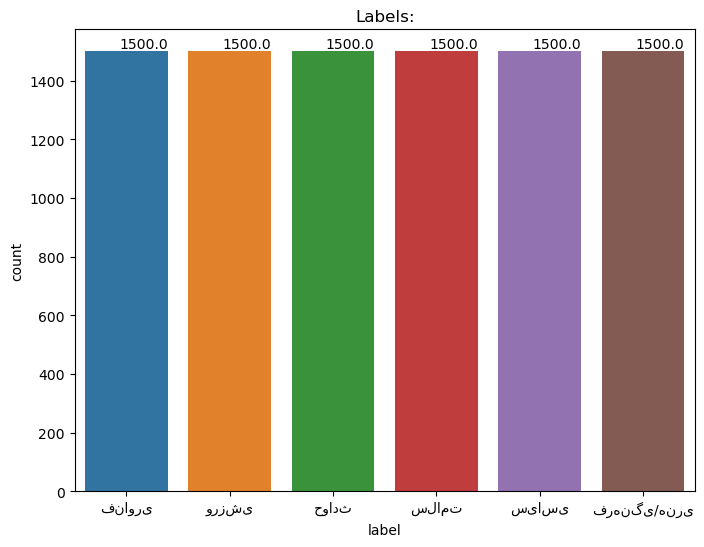

In [5]:
plt.figure(figsize=(8,6))
plt.title("Labels:")
ax = sns.countplot(x=train['label'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.33, p.get_height()+10))

plt.show()

Here, I am going to define a function that takes text and do some text preprocessing on it using Hazm and re libraries; These are:

Strip: remove characters (Here, just whitespaces) from the beginning and end of a string.

Hazm Normalizer: this module do some corrections on persian texts such as remove extra spaces, convert english numbers to persian numbers format, remove diacritics, persian affixes spacing, punctuation spacing, etc.

compile some special unicodes with the help of re.compile method.

\u200c: ZERO WIDTH NON-JOINER

\u200d: ZERO WIDTH JOINER

\u2640-\u2642: Female and male symbols

\u2600-\u2B55: Various weather symbols, arrows, and pictographs

\u23cf: Eject button symbol

\u23e9: Fast forward button symbol

\u231a: Watch symbol

\u3030: Wave dash symbol

\ufe0f: Variation selector-16 (typically used in combination with emojis)

\u2069: Pop directional isolate

\u2066: Left-to-right isolate

\u2068: First strong isolate

\u2067: Right-to-left isolate


In [6]:
def delete_digit_and_punctuation(input):
    output=""
    punctuations = ['»','،','«',' ،', '، ',')','(','؛','-']
    for i in range(len(input)) :
        #input[i] = lemmatizer.lemmatize(input[i])
        if ((input[i].isdigit()) or (input[i] in punctuations) or (input[i]in stop_words)) == False:
            output+=(input[i])
    return output

In [7]:
train = train.replace({'\n': '', '\r': ''}, regex=True)
test = test.replace({'\n': '', '\r': ''}, regex=True)

In [8]:
import re
import hazm 

normalizer = hazm.Normalizer()
stemmer = Stemmer()
lemmatizer = Lemmatizer()
def text_preprocessing(txt):
    txt = txt.strip()
    txt = normalizer.normalize(txt)
    txt = normalizer.remove_specials_chars(txt)
    txt = delete_digit_and_punctuation(txt)
    extra_characters = re.compile("["
    u"\u200c"
    u"\u200d"
    u"\u2640-\u2642"
    u"\u2600-\u2B55"
    u"\u23cf"
    u"\u23e9"
    u"\u231a"
    u"\u3030"
    u"\ufe0f"
    u"\u2069"
    u"\u2066"
    u"\u2068"
    u"\u2067"
    "]+", flags=re.UNICODE)

    txt = extra_characters.sub(r'', txt)
    txt = word_tokenize(txt) # or sent_tokenize()
    l = 0 
    for i in range(len(txt)):
        if (len(txt[i - l]) > 3):
            txt[i - l] = stemmer.stem(txt[i - l])
            txt[i - l] = lemmatizer.lemmatize(txt[i - l])
        else:
            del txt[i - l]
            l = l + 1
    
    
    return txt

In [9]:
train['cleaned_texts'] = (train['content'] ).apply(text_preprocessing)
test['cleaned_texts'] = (test['content'] ).apply(text_preprocessing)


These are some important and vital preprocesses. I will run my model on this data and after all I will try other preprocesses.

### Q2. explain the replacement of words by stemming or lemmatization
Stemming and lemmatization are both techniques used in natural language processing and text preprocessing to reduce words to their base or root form. However, they differ in their approach and the results they produce.

**Stemming:**

Stemming is a heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time. It is a crude approach that doesn't involve understanding the context in which a word is used and typically cuts off prefixes or suffixes based on common patterns. This can result in the "stem" of the word, which may not always be a valid word in itself.

For example, the words "running", "runner", and "ran" could all be stemmed to the root "run". One of the most common stemming algorithms is the Porter Stemmer, which applies a series of rules based on the morphology of English words.

The process of stemming can be visualized as:

Original words: ["running", "runner", "ran"]
Stemmed words: ["run", "run", "ran"]

Here the base word "run" is identified by simply shaving off the parts of the word that seem to indicate tense or plurality, etc.

**Lemmatization:**

Lemmatization, on the other hand, involves resolving words to their dictionary form (called a lemma) for a given part of speech. Unlike stemming, lemmatization considers the context, and part of speech of a word to convert it to its base or root form. It is a more sophisticated approach that uses vocabulary, morphological analysis, and understands the grammar of a language to apply a morphological analysis to words.

For instance, if we apply lemmatization to the words "am", "are", and "is", they would all be converted to "be", because they are all forms of the verb "to be". For the nouns "geese" and "goose", lemmatization would convert them back to "goose" because "geese" is the plural of "goose".

The process can be illustrated as:

Original words: ["running", "runner", "ran"]
Lemmatized words: ["run", "runner", "run"]

Here the lemma of "running" and "ran" is "run", while "runner" remains "runner" since it is already in its base form.

In summary, stemming is faster but less precise as it uses a series of heuristics to clip words, often leading to incomplete or inaccurate word forms. In contrast, lemmatization is more accurate and produces linguistically correct lemmas, but requires more computational resources to analyze the structure of each word, its context, and its part of speech. Lemmatization is generally preferred when the precise text representation is crucial for the task at hand, such as in natural language understanding systems.

# Part2. 
## Problem process

In [10]:
mean_length = train['cleaned_texts'].str.len().mean()
max_length = train['cleaned_texts'].str.len().max()
print(max_length)

3806


### Q3. Explain the reason for using the embeding and its features in the report.


1. **Semantic Similarity**: Embeddings enable measuring semantic similarity between words or sentences in a continuous vector space. By calculating the cosine similarity between the embeddings of two words or sentences, you can determine their semantic relatedness.

2. **Dimensionality Reduction**: Embeddings reduce the dimensionality of text data. Words or documents represented as high-dimensional vectors can be transformed into lower-dimensional embeddings, making the data more manageable and computationally efficient.

3. **Representation of Out-of-Vocabulary Words**: Embeddings can provide representations for words that were not present in the training data. These representations capture the semantic context of unseen or rare words based on their context in the training corpus.

4. **Word Analogies**: Embeddings can capture semantic relationships, which allows for solving word analogy problems. For example, by performing vector arithmetic, such as subtracting the embedding of "king" from "man" and adding "woman," the resulting vector would be close to the embedding of "queen."

5. **Transfer Learning**: Pre-trained embeddings, such as Word2Vec, GloVe, or BERT, offer transfer learning capabilities. These pre-trained models are trained on large-scale datasets and can be used as a starting point in NLP tasks, even with limited domain-specific data.

6. **Contextual Understanding**: Contextual word embeddings, such as ELMO and BERT, capture context-dependent representations. They take surrounding words into account to generate embeddings, allowing models to understand word meanings in different contexts.

7. **Improving Model Performance**: By incorporating embeddings as input features into NLP models, such as neural networks or traditional machine learning algorithms, you can often achieve improved performance on various tasks, such as text classification, named entity recognition, or sentiment analysis.



### Q4. explain how "word2vec" and "doc2vec" work. and explain about converting text to feature vector.
"Word2Vec" and "Doc2Vec" are popular algorithms used for generating word and document embeddings, respectively, in natural language processing tasks. Here's an explanation of how they work:

1. **Word2Vec**:
   - Word2Vec is designed to learn distributed representations of words based on the context in which they appear in a large corpus of text.
   - It consists of two main architectures: Continuous Bag of Words (CBOW) and Skip-gram.
   - In CBOW, the model predicts the target word based on the surrounding context words, while in Skip-gram, the model predicts the context words given a target word.
   - Word2Vec uses a shallow neural network with a hidden layer that represents the embedding layer. This layer learns the vector representation of words by adjusting the weights of the neural network during training.
   - The training process involves optimizing the model to maximize the probability of predicting the correct context words given the target word or vice versa.
   - Once trained, Word2Vec generates densely distributed word embeddings, where semantically similar words are located close to each other in the vector space.
   
2. **Doc2Vec**:
   - Doc2Vec expands on the Word2Vec concept by generating embeddings not only for individual words but also for entire documents or sentences.
   - One popular implementation of Doc2Vec is called Paragraph Vector.
   - Doc2Vec extends the Word2Vec model by introducing additional vector representations, including document vectors.
   - It works by adding an extra vector representing the document or sentence to the architecture of Word2Vec.
   - During the training process, the document vector is concatenated with word vectors, and the model is trained to predict the target word or document given the context.
   - Once trained, Doc2Vec generates continuous representations of documents in a similar vector space as Word2Vec embeddings, capturing the semantic features of the text.
   - These document vectors can be used for tasks such as document classification, sentiment analysis, or information retrieval.

**Converting Text to Feature Vector**:
Converting text to a feature vector is crucial for utilizing machine learning algorithms that require numerical input. Here's an overview of the process:

1. **Tokenization**: The text is split into individual tokens such as words or characters, depending on the specific requirements of the task.
   
2. **Preprocessing**: This step involves cleaning the text data by removing punctuation, converting to lowercase, applying stemming or lemmatization, and removing stop words.

3. **Vocabulary Creation**: The unique tokens obtained after preprocessing form the vocabulary of the text corpus.

4. **Vectorization**: There are several methods to represent text as feature vectors:
   - **Bag of Words (BoW)**: Each document is represented as a vector where each index corresponds to a token in the vocabulary. The value at each index represents the frequency or occurrence of the corresponding token in the document.
   - **TF-IDF**: Term Frequency-Inverse Document Frequency calculates the importance of a term in a document relative to its occurrence across the entire corpus.
   - **Word Embeddings**: Word embeddings like Word2Vec or pre-trained models like BERT can be used to convert words or sentences into low-dimensional continuous vectors.

5. **Feature Scaling**: The feature vectors may undergo normalization or scaling to ensure they are within a similar range for effective modeling.

The resulting feature vectors can be used as input to various machine learning or deep learning models to perform tasks such as text classification, sentiment analysis, or information retrieval.


### Q5. Explain about the K-means DBSCAN methods and the advantages and disadvantages of these methods.
Sure! Let's start by explaining K-means and DBSCAN, and then we'll discuss their advantages and disadvantages.

**K-means**:
K-means is a popular clustering algorithm that aims to divide a dataset into K clusters. Here's how it works:

1. **Initialization**: Randomly select K points from the dataset as initial cluster centroids.
2. **Assignment**: Assign each data point to the nearest centroid based on a distance metric (usually Euclidean distance).
3. **Update**: Recalculate the centroid of each cluster based on the assigned data points.
4. **Repeat**: Iterate the assignment and update steps until convergence (when centroids no longer change significantly) or until a specified number of iterations.

K-means seeks to minimize the within-cluster sum of squared distances, aiming to create compact and spherical clusters. It works well when the clusters are well-separated, have a similar size, and are roughly spherical.

**DBSCAN**:
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm. It groups together data points that are closely packed together while identifying noise points. Here's an overview:

1. **Density-Based Clustering**: DBSCAN defines clusters based on density. It starts with an arbitrary data point and expands the cluster by adding nearby points within a specified radius (eps) until it reaches a low-density region.
2. **Core Points, Border Points, and Noise Points**: DBSCAN categorizes points as:
   - Core Points: Points within eps distance of at least minPts (minimum number of points) form core points and become the seed for cluster expansion.
   - Border Points: Points within eps distance of a core point but not meeting the minPts criteria are assigned to the cluster as border points.
   - Noise Points: Points that are neither core points nor border points are treated as noise points and not assigned to any cluster.
3. **Connectivity**: DBSCAN connects dense regions of points to form clusters, allowing them to be of arbitrary shape and size.
4. **Parameter Selection**: DBSCAN requires specifying the eps and minPts parameters, which can significantly impact the clustering results.

**Advantages of K-means**:
- Simple and easy to implement.
- Efficient for large datasets.
- Works well with well-separated and spherical clusters.
- Converges to a local minimum, ensuring a stable solution.

**Disadvantages of K-means**:
- Requires specifying the number of clusters (K) beforehand.
- Sensitive to the initial centroid selection, can converge to different results for different initializations.
- Assumes clusters of equal sizes and isotropic shapes, which may not be valid for all datasets.
- Outliers can significantly affect the clustering results.

**Advantages of DBSCAN**:
- Can discover clusters of arbitrary shape and size.
- Robust to outliers and noise points.
- Does not require specifying the number of clusters beforehand.
- Generates a meaningful density-based clustering structure.

**Disadvantages of DBSCAN**:
- Sensitivity to parameter selection, especially eps and minPts.
- Struggles with clusters of varying densities.
- May have difficulty separating clusters that are close together.

Both K-means and DBSCAN have their strengths and weaknesses, and the choice between them depends on the specific characteristics of the dataset and the desired clustering outcome.


In [11]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

train_tagged = train.apply(
    lambda r: TaggedDocument(words=r['cleaned_texts'], tags=[r.label]), axis=1)
model = Doc2Vec(vector_size=14, min_count=2, epochs=30)
model.build_vocab(train_tagged.values)
model.train(train_tagged.values, total_examples=len(train_tagged.values), epochs=30)
train_vectors = [model.infer_vector(doc.words) for doc in train_tagged.values]


In [12]:
test_tagged = test.apply(
    lambda r: TaggedDocument(words=r['cleaned_texts'], tags=[r.label]), axis=1)
test_vectors = [model.infer_vector(doc.words) for doc in test_tagged.values]


In [13]:
train_vectors_np = np.array(train_vectors)
test_vectors_np = np.array(test_vectors)
data = np.concatenate((train_vectors_np, test_vectors_np))

In [14]:
from sklearn.cluster import KMeans

k = 6  
kmeans_model = KMeans(n_clusters=k, random_state=42 , n_init = 100)
kmeans_model.fit(data)
cluster_assignments = kmeans_model.labels_

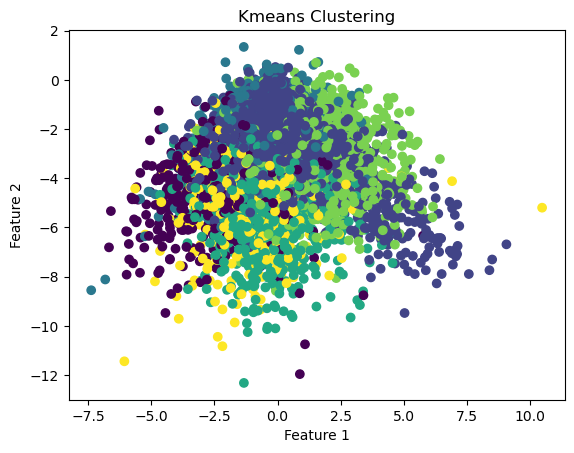

In [15]:
import matplotlib.pyplot as plt
plt.scatter(data[:, 0], data[:, 1], c=cluster_assignments)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Kmeans Clustering')
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df = pd.concat([train ,test] , axis = 0)
encoded_labels = label_encoder.fit_transform(df["label"])


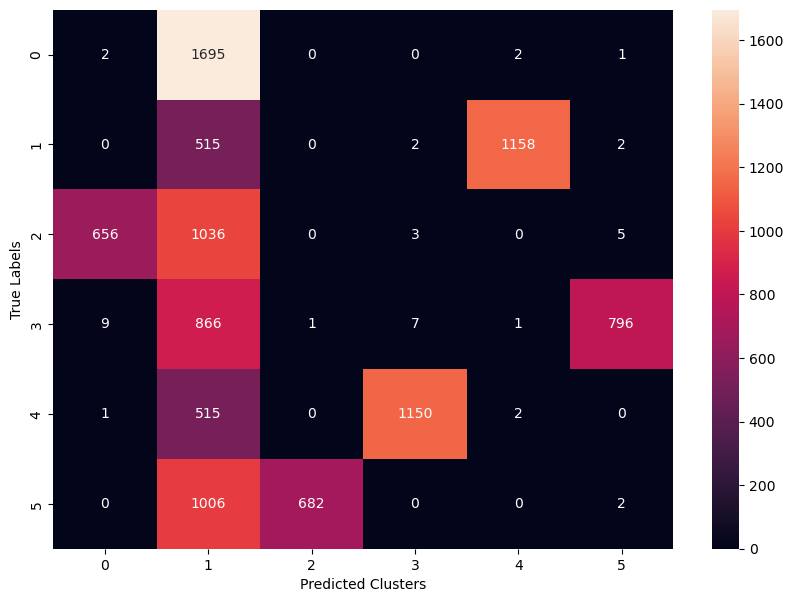

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(encoded_labels, cluster_assignments)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted Clusters')
plt.ylabel('True Labels')
plt.show()

In [18]:
def compute_acc(cm):
    n = cm.shape[0]
    max_sum = 0
    used_columns = set()
    
    for i in range(n):
        max_value = 0
        max_index = -1
        
        for j in range(n):
            if j not in used_columns and cm[i][j] > max_value:
                max_value = cm[i][j]
                max_index = j
        
        max_sum += max_value
        used_columns.add(max_index)
    num_all = cm.sum()
    acc = max_sum / num_all
    print (f"accuracy is: {acc : 5.2f}%")
compute_acc(cm)

accuracy is:  0.61%


In [20]:
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score

homogeneity = homogeneity_score(encoded_labels, cluster_assignments)
print('Homogeneity score: %.3f' % homogeneity)

s = silhouette_score(data, cluster_assignments)
print('silhouette score: %.3f' % s)

Homogeneity score: 0.456
silhouette score: 0.329


In [21]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=5,               # The maximum distance between two samples for them to be considered as in the same neighborhood
            min_samples=20,         # The number of samples in a neighborhood for a point to be considered as a core point
            metric='euclidean',    # The metric to use when calculating distance between instances in a feature array
            metric_params=None,    # Additional keyword arguments for the metric function
            algorithm='auto',      # The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors
            leaf_size=30,          # Leaf size passed to BallTree or cKDTree
            p=None,                # The power of the Minkowski metric to be used to calculate distance between points
            n_jobs=None)           # The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors

# Fit DBSCAN to the training data
db.fit(data)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 519


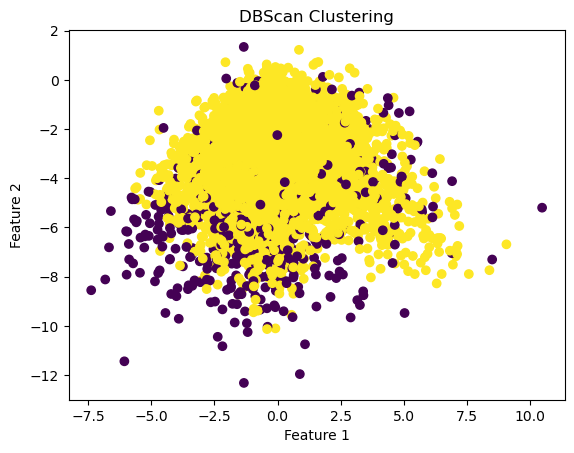

In [22]:
import matplotlib.pyplot as plt
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBScan Clustering')
plt.show()

### Q6. Compare the output of two types of clustering.

Because in the DBScan method, we usually seek to specify the type of noise data and it is very difficult to accurately categorize the data into specific groups, in the first part, we extracted only the noise data using the DBScan method. But in the KMeans method, because we had specified k to the value of 6, we got relatively good accuracy. After reducing the dimensions, we were able to achieve conditions close to the desired conditions from DBSCan with frequent changes of its parameters. In this method, we were able to have a good classification by using KMeans. But if we had more than 2 features, the situation would be better


# Part3. 
## Dimentionality Reduction

### Q7. What is PCA and briefly explain how it works.
PCA stands for Principal Component Analysis. It's a popular dimensionality reduction technique used to transform a dataset into a lower-dimensional space while retaining most of its important information. Here's how it works:

1. **Data Standardization**: Before applying PCA, it's common to standardize the dataset by subtracting the mean and dividing by the standard deviation of each feature. This ensures that all features contribute equally to the analysis.

2. **Eigendecomposition or Singular Value Decomposition (SVD)**: PCA utilizes the eigenvectors and eigenvalues of the covariance matrix (or the singular value decomposition) of the standardized data. 

   - **Eigendecomposition**: It involves calculating the covariance matrix of the standardized data and decomposing it into its eigenvectors and eigenvalues. The eigenvectors represent the principal components, and the corresponding eigenvalues indicate the amount of variance explained by each principal component.
   
   - **Singular Value Decomposition (SVD)**: SVD is an alternative method to perform PCA. It directly decomposes the standardized data matrix into three matrices: U, Σ, and V. The columns of U represent the left singular vectors (principal components), Σ is a diagonal matrix with the singular values (related to eigenvalues) on the diagonal, and V contains the right singular vectors.
   

3. **Selection of Principal Components**: The next step is to select the principal components based on their corresponding eigenvalues or singular values. A common approach is to arrange them in descending order and choose the top-k components that explain the most variance. These top-k principal components capture most of the dataset's variability.

4. **Dimensionality Reduction**: Finally, the selected principal components are used to transform the original dataset into a lower-dimensional space. This transformation replaces the original features with new features, which are linear combinations of the original features.

The reduced-dimensional dataset retains as much information as possible from the original dataset while reducing redundancy. PCA aims to create new features, known as principal components, that have minimal correlation with each other. The first principal component captures the most significant variance in the data, followed by the second, and so on.

PCA is widely used in various fields such as image processing, finance, and genetics. It helps visualize high-dimensional data, remove redundant features, and improve computational efficiency in subsequent analysis tasks.


In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
reduced_data = pca.fit_transform(data)


In [24]:
from sklearn.cluster import KMeans
k = 6  
kmeans_model = KMeans(n_clusters=k, random_state=42 , n_init = 100)
kmeans_model.fit(reduced_data)
reduced_cluster_assignments = kmeans_model.labels_

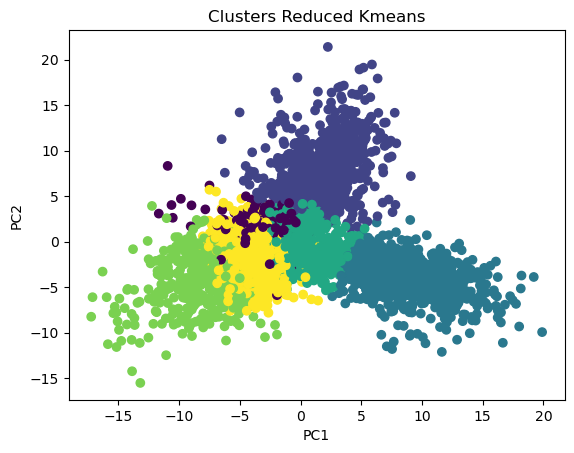

In [25]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=reduced_cluster_assignments)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters Reduced Kmeans')
plt.show()

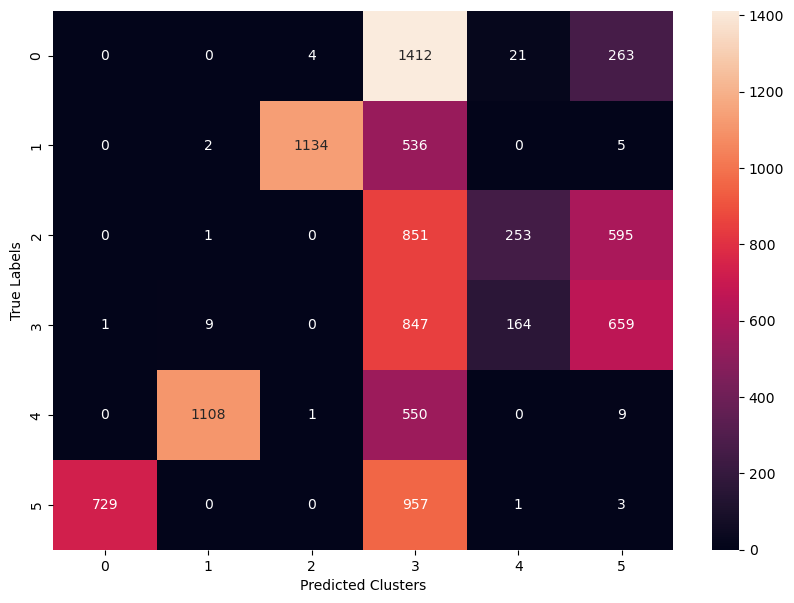

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(encoded_labels, reduced_cluster_assignments)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted Clusters')
plt.ylabel('True Labels')
plt.show()

In [27]:
compute_acc(cm)

accuracy is:  0.51%


In [28]:
from sklearn.metrics import homogeneity_score

homogeneity = homogeneity_score(encoded_labels, reduced_cluster_assignments)
print('Homogeneity score: %.3f' % homogeneity)

s = silhouette_score(reduced_data, reduced_cluster_assignments)
print('silhouette score: %.3f' % s)

Homogeneity score: 0.387
silhouette score: 0.420


In [79]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1,               # The maximum distance between two samples for them to be considered as in the same neighborhood
            min_samples=10,         # The number of samples in a neighborhood for a point to be considered as a core point
            metric='euclidean',    # The metric to use when calculating distance between instances in a feature array
            metric_params=None,    # Additional keyword arguments for the metric function
            algorithm='auto',      # The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors
            leaf_size=30,          # Leaf size passed to BallTree or cKDTree
            p=None,                # The power of the Minkowski metric to be used to calculate distance between points
            n_jobs=None)           # The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors

# Fit DBSCAN to the training data
db.fit(reduced_data)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 1167


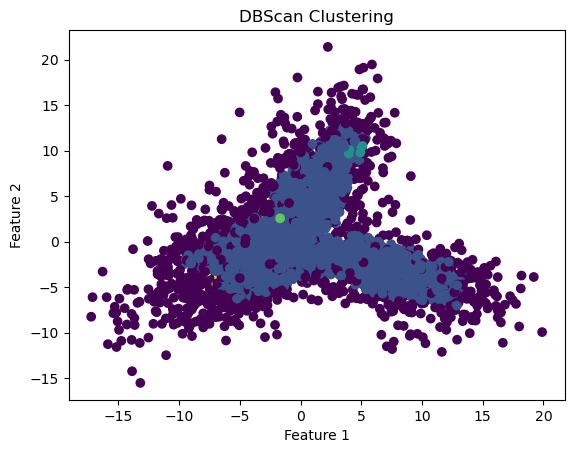

In [80]:
import matplotlib.pyplot as plt
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBScan Clustering')
plt.show()

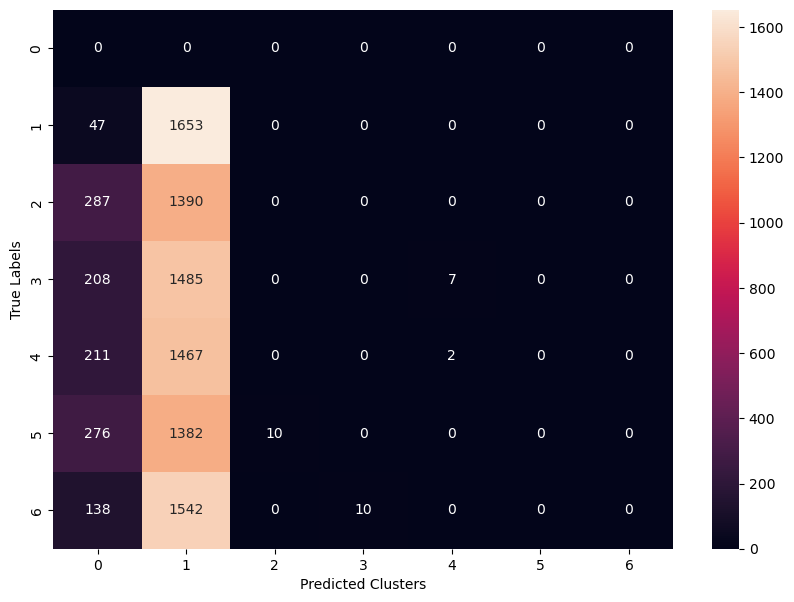

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(encoded_labels, labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted Clusters')
plt.ylabel('True Labels')
plt.show()

In [82]:
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score

homogeneity = homogeneity_score(encoded_labels, labels)
print('Homogeneity score: %.3f' % homogeneity)

s = silhouette_score(reduced_data, labels)
print('silhouette score: %.3f' % s)

Homogeneity score: 0.010
silhouette score: 0.226


### Q8. Explain how to calculate the silhouette homogeneity criterion.


1. **Silhouette Coefficient**: The silhouette coefficient is a measure of how well each sample within a cluster fits its assigned cluster and how distinct it is from the neighboring clusters. It provides an assessment of clustering quality. The silhouette coefficient (\(s\)) for a specific sample is calculated using the following formula:

   $[ s = \frac{b - a}{\max(a, b)} ]$

   where \(a\) is the mean distance between the sample and other points within the same cluster, and \(b\) is the mean distance between the sample and points in the nearest neighboring cluster. The silhouette coefficient ranges from -1 to 1, where values close to 1 indicate well-separated clusters, values close to 0 indicate overlapping clusters, and values close to -1 indicate misclassified samples.

   To compute the overall silhouette coefficient for a clustering algorithm, the average silhouette coefficient across all samples is calculated.

2. **Homogeneity Score**: The homogeneity score measures how well each cluster contains only samples that belong to a single class or category. It is used to evaluate the quality of a clustering algorithm when the ground truth labels are known. The homogeneity score ranges from 0 to 1, where values close to 1 indicate high homogeneity, meaning each cluster consists of samples from a single class.

   The homogeneity score is calculated using entropy-based metrics. It quantifies the similarity between the clustering labels and the ground truth labels. Higher values indicate better cluster homogeneity.

   It's important to note that the silhouette coefficient and homogeneity score are distinct metrics used for different purposes. The silhouette coefficient assesses the overall clustering quality, while the homogeneity score evaluates the degree to which each cluster represents a single class or category.
   
   
   

_______________________________________________________________________________


To calculate the silhouette homogeneity criterion, you can follow these steps:

1. Calculate the cluster centroids or means: First, you need to calculate the centroid or mean for each cluster in your dataset. The centroid is the average position of all the data points in a cluster.

2. Calculate the distance between each data point and all cluster centroids: For each data point, calculate the distance to each cluster centroid. You can use a distance metric such as Euclidean distance or any other suitable metric.

3. Determine the nearest and second-nearest cluster centroids for each data point: For each data point, identify the nearest and second-nearest cluster centroids based on the distances calculated in the previous step.

4. Calculate the silhouette value for each data point: The silhouette value for a data point measures how similar it is to other data points in its own cluster compared to data points in other clusters. It is calculated using the formula:
   silhouette value = (b - a) / max(a, b)
   where a is the average distance from the data point to other data points in the same cluster, and b is the average distance from the data point to data points in the nearest neighboring cluster.

5. Calculate the average silhouette value for all data points: Finally, calculate the average silhouette value for all data points in the dataset to obtain the overall silhouette homogeneity criterion.

This criterion can be used to assess the homogeneity of clusters, with higher values indicating that the clusters are well-defined and homogeneous.

### Q9. Report the results of the mentioned indicators for each of the methods.
done

### Q10. Suggest solutions to improve the performance of the models


### KMeans

1. **Feature Scaling**: KMeans is sensitive to the scale of the data. Features on larger scales can dominate the algorithm's behavior. Standardizing or normalizing your data ensures that each feature contributes equally to the distance computations.

2. **Feature Selection**: Remove irrelevant or redundant features. KMeans can perform poorly if the dataset contains features that are not useful for clustering.

3. **Choosing the Right Number of Clusters (`k`)**: Use methods like the Elbow Method, the Silhouette Coefficient, or the Gap Statistic to determine an appropriate number of clusters.

4. **Initializing Centroids Wisely**: The default method in scikit-learn's KMeans is 'k-means++', which is generally better than random initialization. However, running the algorithm multiple times with different initializations and choosing the best result can also be beneficial.

5. **Handling Non-spherical Data**: KMeans assumes that clusters are spherical and equally sized, which is not always the case. Sometimes transforming the data, e.g., using PCA for dimensionality reduction, can lead to more spherical clusters.

### DBSCAN

1. **Parameter Tuning**:
   - **`eps` and `min_samples`**: These are crucial parameters. Use a k-distance plot to choose an appropriate `eps` value. The `min_samples` can be set based on domain knowledge or experimental tuning.
   - **Distance Metric**: The choice of distance metric (Euclidean, Manhattan, etc.) can significantly affect the results. Choose one that makes sense for your data.

2. **Data Scaling**: Like KMeans, DBSCAN is sensitive to the scale of the data. Normalizing or standardizing your features can lead to better clustering results.

3. **Dealing with High Dimensionality**: In high dimensions, distance metrics become less useful (curse of dimensionality). Dimensionality reduction techniques like PCA or t-SNE might help before applying DBSCAN.

4. **Handling Noise**: DBSCAN can identify outliers as noise. Analyzing these noise points can provide insights and help in adjusting parameters if too many points are classified as noise.

5. **Experimenting with Different Parameters**: There's no one-size-fits-all set of parameters for DBSCAN. Experiment with different values of `eps` and `min_samples`, and assess the clustering results.

### General Tips for Both Algorithms

- **Understanding Your Data**: Know the characteristics of your dataset. Clustering is an exploratory technique, and its success often hinges on how well the data and its features represent the problem you're trying to solve.

- **Use of Domain Knowledge**: Incorporating domain knowledge can guide you in preprocessing, feature engineering, and interpreting the results.

- **Evaluation Metrics**: Use internal evaluation metrics like the Silhouette Coefficient, Calinski-Harabasz Index, or Davies-Bouldin Index to assess the quality of clusters.

- **Visualizing Results**: If feasible, visualize your clustering results using techniques like scatter plots or t-SNE. This can give you insights into the clusters and how well the algorithm is performing.

- **Algorithm Selection**: Sometimes, the chosen algorithm might not be the best fit for the data. Be open to trying different clustering algorithms.

Remember, clustering is as much an art as it is a science, and iterative experimentation is often key to finding the best approach for your specific dataset.

